# PERGUNTAS PARA A ANÁLISE

1. "Com base em dados como idade, renda, escolaridade e outros fatores, é possível prever a classificação do crédito de uma pessoa?"<br>
→ Objetivo: Prever a variável Credit Score.<br>
→ Tipo: Classificação multiclasse (High, Medium, Low).<br><br>

2. "Pessoas casadas têm mais chances de ter crédito alto do que pessoas solteiras?"<br>
→ Objetivo: Avaliar a influência de Marital Status sobre o Credit Score.<br>
→ Você pode usar visualizações e também verificar a importância das features no modelo.<br><br>

3. "O número de filhos afeta diretamente a pontuação de crédito de um indivíduo?"<br>
→ Objetivo: Entender se a feature Number of Children tem relevância na predição.<br><br>

4. "O tipo de moradia (própria ou alugada) impacta o score de crédito?"<br>
→ Objetivo: Avaliar a importância de Home Ownership na previsão de crédito.<br><br>

5. "Qual perfil tem maior chance de ter crédito alto: uma mulher jovem com ensino superior e renda média, ou um homem mais velho com ensino médio e alta renda?"<br>
→ Objetivo: Criar perfis simulados com base nas colunas Age, Gender, Income, Education, e ver o comportamento do modelo ao classificá-los.<br>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Credit-Score.csv')

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


### Tratamento de dados

In [4]:
# Valores nulos
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [5]:
# Valores ausentes
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [6]:
# Valores duplicados
df.duplicated().sum()

62

In [7]:
duplicadas = df[df.duplicated()]
print(duplicadas)

     Age  Gender  Income            Education Marital Status  \
73    27  Female   37500  High School Diploma         Single   
74    32    Male   57500   Associate's Degree         Single   
79    28  Female   32500   Associate's Degree         Single   
80    33    Male   52500  High School Diploma         Single   
81    38  Female   67500    Bachelor's Degree        Married   
..   ...     ...     ...                  ...            ...   
159   29  Female   27500  High School Diploma         Single   
160   34    Male   47500   Associate's Degree         Single   
161   39  Female   62500    Bachelor's Degree        Married   
162   44    Male   87500      Master's Degree         Single   
163   49  Female   77500            Doctorate        Married   

     Number of Children Home Ownership Credit Score  
73                    0         Rented          Low  
74                    0         Rented      Average  
79                    0         Rented          Low  
80             

In [8]:
# Verificando linhas duplicadas
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
29,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
135,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
58,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
90,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
122,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
...,...,...,...,...,...,...,...,...
146,51,Male,140000,Bachelor's Degree,Married,0,Owned,High
46,52,Male,130000,High School Diploma,Married,0,Owned,High
152,52,Male,130000,High School Diploma,Married,0,Owned,High
52,53,Male,122500,Associate's Degree,Married,0,Owned,High


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [12]:
print("Valore únicos nas colunas:")
for col in df.select_dtypes(include = 'object'):
    print(df[col].unique())

Valore únicos nas colunas:
['Female' 'Male']
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
['Single' 'Married']
['Rented' 'Owned']
['High' 'Average' 'Low']


## Pré processamento de dados

In [43]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [62]:
# Features(X)
x_credit = df.iloc[:, 0:7]
x_credit

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,Female,50000,Bachelor's Degree,Single,0,Rented
1,30,Male,100000,Master's Degree,Married,2,Owned
2,35,Female,75000,Doctorate,Married,1,Owned
3,40,Male,125000,High School Diploma,Single,0,Owned
4,45,Female,100000,Bachelor's Degree,Married,3,Owned
...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented
160,34,Male,47500,Associate's Degree,Single,0,Rented
161,39,Female,62500,Bachelor's Degree,Married,2,Owned
162,44,Male,87500,Master's Degree,Single,0,Owned


In [14]:
# Target(Y)
y_credit = df['Credit Score']
y_credit

0         High
1         High
2         High
3         High
4         High
        ...   
130       High
131    Average
132       High
133    Average
134       High
Name: Credit Score, Length: 102, dtype: object

In [111]:
y_credit.unique()

array(['High', 'Average', 'Low'], dtype=object)

Utilização do One Hot Encoder para o pré-processamento dos dados

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

In [16]:
OHE_credit = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 4, 6])], remainder = 'passthrough')

In [17]:
x_credit = OHE_credit.fit_transform(x_credit)

In [18]:
x_credit

array([[1.00e+00, 0.00e+00, 0.00e+00, ..., 2.50e+01, 5.00e+04, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 3.00e+01, 1.00e+05, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 3.50e+01, 7.50e+04, 1.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 3.20e+01, 8.50e+04, 0.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 2.90e+01, 6.80e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 3.40e+01, 1.05e+05, 1.00e+00]])

Escalonamento com StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [20]:
x_credit

array([[ 0.98058068, -0.98058068, -0.39886202, ..., -1.60978928,
        -1.18758425, -0.73715445],
       [-1.0198039 ,  1.0198039 , -0.39886202, ..., -1.03284442,
         0.36242974,  1.50731582],
       [ 0.98058068, -0.98058068, -0.39886202, ..., -0.45589956,
        -0.41257725,  0.38508068],
       ...,
       [-1.0198039 ,  1.0198039 , -0.39886202, ..., -0.80206648,
        -0.10257446, -0.73715445],
       [ 0.98058068, -0.98058068, -0.39886202, ..., -1.14823339,
        -0.62957921,  1.50731582],
       [-1.0198039 ,  1.0198039 , -0.39886202, ..., -0.57128853,
         0.51743114,  0.38508068]])

Utilização do Label Encoder para codificar o target(Y)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
LE_credit = LabelEncoder()
y_credit = LE_credit.fit_transform(y_credit)

In [23]:
y_credit

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [26]:
np.unique(y_credit)

array([0, 1, 2])

Separando em dados de treino e teste

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [29]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((76, 14), (76,))

In [30]:
x_credit_teste.shape, y_credit_teste.shape

((26, 14), (26,))

Salvando os dados de treino e teste

In [1]:
import pickle

In [32]:
with open('Pickle/credit.pkl', mode = 'wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

In [2]:
with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((76, 14), (76,))

In [4]:
x_credit_teste.shape, y_credit_teste.shape

((26, 14), (26,))

### Treinando modelo Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB

In [6]:
naive_credit = GaussianNB()
naive_credit.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [7]:
previsao_credit = naive_credit.predict(x_credit_teste)

In [8]:
previsao_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [9]:
y_credit_teste

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [10]:
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# 100% de acerto
round(accuracy_score(y_credit_teste, previsao_credit), 2)

1.0

In [12]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



1.0

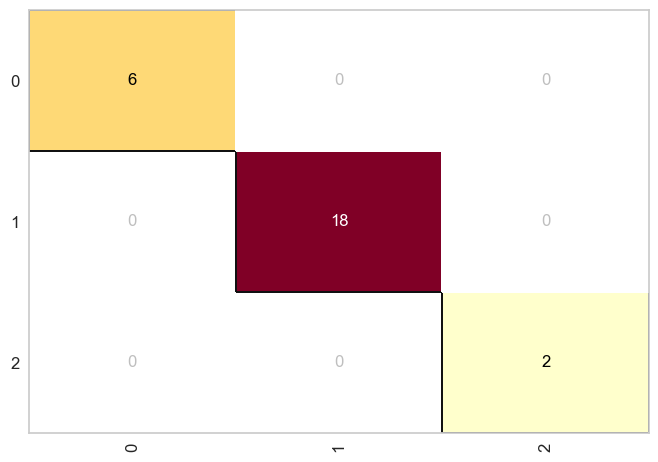

In [13]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

## Modelo treinado
Todos os dados foram pré processados e inseridos no modelo naive bayes, com uma previsão de 100% de acerto.<BR><br>

Mas como a previsão foi boa até demais, pode ser que isso seja um overfitting, quando os dados tem um desempenho bom no treinamento mas tem um mal desempenho com os dados de teste.

In [16]:
# Previsão de treino
previsao_treino = naive_credit.predict(x_credit_treinamento)
print(f"Treino: {round(accuracy_score(y_credit_treinamento, previsao_treino), 2)}")

Treino: 0.89


In [19]:
# Previsão de teste
previsao_teste = naive_credit.predict(x_credit_teste)
print(f"Teste: {round(accuracy_score(y_credit_teste, previsao_teste), 2)}")

Teste: 1.0


## Problema detectado pelo GPT: Vazamento de dados
Quando um modelo tem um desempenho melhor no teste do que no treino, isso não é normal ou esperado, e um dos motivos mais suspeitos é o vazamento de dados(data leakage), o que foi exatamente o que aconteceu nesse caso.<br><br>

### Separação de treino e teste antes do pré-processamento
O vazamento de dados acontece quando o modelo de machine learning utiliza informações dos dados de treinamento que não deveriam ser usadas, que no caso são os dados de teste, o que atrapalha na previsão dos resultados. Portanto, os dados devem ser separados em treino e teste antes de utilizar o processamento de dados de One Hot Encoder, Label encoder e Standard Scaler, porque caso contrário, o modelo vai ter acesso aos dados de teste durante o treinamento e haverá vazamento de dados.

In [71]:
# Features(X)
x_credit = df.iloc[:, 0:7]
x_credit

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,Female,50000,Bachelor's Degree,Single,0,Rented
1,30,Male,100000,Master's Degree,Married,2,Owned
2,35,Female,75000,Doctorate,Married,1,Owned
3,40,Male,125000,High School Diploma,Single,0,Owned
4,45,Female,100000,Bachelor's Degree,Married,3,Owned
...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented
160,34,Male,47500,Associate's Degree,Single,0,Rented
161,39,Female,62500,Bachelor's Degree,Married,2,Owned
162,44,Male,87500,Master's Degree,Single,0,Owned


In [72]:
# Target(Y)
y_credit = df['Credit Score']
y_credit

0         High
1         High
2         High
3         High
4         High
        ...   
159        Low
160    Average
161       High
162       High
163       High
Name: Credit Score, Length: 164, dtype: object

In [73]:
from sklearn.model_selection import train_test_split
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

### Pré-processamento dos dados

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

OBS: O 'fit_transform' deve ser usado apenas nos dados de treino, para aprender os parâmetros dos dados e aplicar a transformação. Já o 'transform' usa a transformação já treinada e aplica os parâmetros, então deve ser usado nos dados de teste.

In [75]:
OHE_credit = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 4, 6])], remainder = 'passthrough')
x_credit_treinamento = OHE_credit.fit_transform(x_credit_treinamento)
x_credit_teste = OHE_credit.transform(x_credit_teste)

In [76]:
# Salvando o pré-proessamento OHE
with open('Pickle/OHE_credit.pkl', 'wb') as arquivo:
    pickle.dump(OHE_credit, arquivo)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit_treinamento = scaler_credit.fit_transform(x_credit_treinamento)
x_credit_teste = scaler_credit.transform(x_credit_teste)

In [78]:
# Salvando o escalonamento Scaler
with open('Pickle/scaler_credit.pkl', 'wb') as arquivo:
    pickle.dump(scaler_credit, arquivo)

In [79]:
from sklearn.preprocessing import LabelEncoder
LE_credit = LabelEncoder()
y_credit_treinamento = LE_credit.fit_transform(y_credit_treinamento)
y_credit_teste = LE_credit.transform(y_credit_teste)

In [107]:
with open('Pickle/LE_credit.pkl', 'wb') as arquivo:
    pickle.dump(LE_credit, arquivo)

In [80]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((123, 14), (123,))

In [81]:
x_credit_teste.shape, y_credit_teste.shape

((41, 14), (41,))

In [82]:
import pickle
with open('Pickle/credit.pkl', mode = 'wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

## Retreinando o modelo Naive Bayes

In [69]:
import pickle
with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [4]:
from sklearn.naive_bayes import GaussianNB

In [8]:
naive_credit = GaussianNB()
naive_credit.fit(x_credit_treinamento, y_credit_treinamento)
previsao_credit = naive_credit.predict(x_credit_teste)

In [9]:
previsao_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y_credit_teste

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1])

In [12]:
from sklearn.metrics import accuracy_score, classification_report
# 100% de acerto
round(accuracy_score(y_credit_teste, previsao_credit), 2)

0.9

In [12]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.76      1.00      0.86        31
           2       0.00      0.00      0.00         2

    accuracy                           0.76        41
   macro avg       0.25      0.33      0.29        41
weighted avg       0.57      0.76      0.65        41



C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7560975609756098

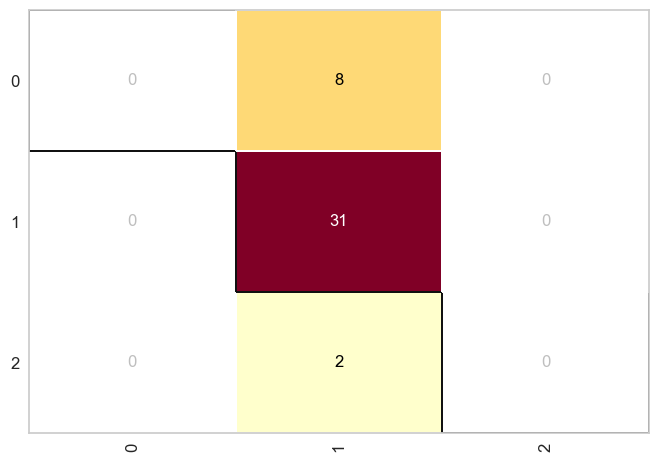

In [13]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [5]:
import pickle
with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)
    
import numpy as np

In [6]:
np.bincount(y_credit_treinamento)

array([28, 82, 13], dtype=int64)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
arvore_credit = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [85]:
previsao_credit = arvore_credit.predict(x_credit_teste)

In [86]:
previsao_credit

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1])

In [87]:
round(accuracy_score(y_credit_teste, previsao_credit), 2)

0.95

In [88]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.97      0.97      0.97        31
           2       1.00      1.00      1.00         2

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



0.9512195121951219

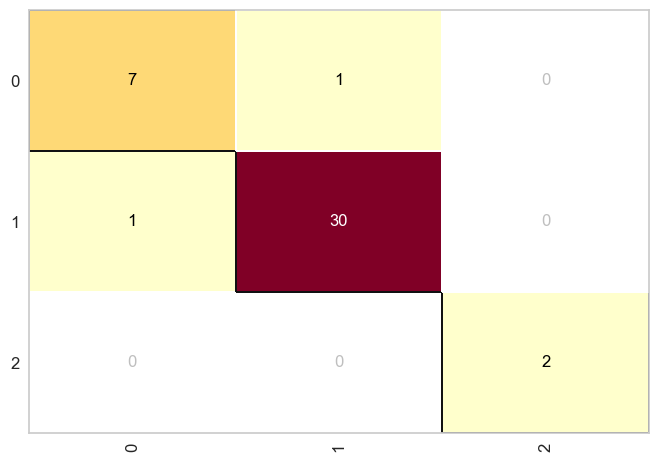

In [89]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [90]:
# Salvando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'wb') as arquivo:
    pickle.dump(arvore_credit, arquivo)

## Próximos passos

Plotar a importância das features (por exemplo: idade, escolaridade, etc.).

Criar visualizações para responder as perguntas preditivas.

Testar o modelo com perfis simulados, como você propôs:

. Mulher jovem com ensino superior e renda média.

. Homem mais velho com ensino médio e renda alta.

### Analisando a importância das features

In [91]:
# Carregando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

In [92]:
previsao_credit = arvore_credit.predict(x_credit_teste)
previsao_credit

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1])

In [93]:
# Importancia de cada coluna das features(x)
importances = arvore_credit.feature_importances_

Agora é preciso acessar o nome das colunas após o pré-processamento(One Hot Encoder) para analisar a importancia de cada uma.

In [94]:
# Pega todos os nomes das colunas one-hot codificadas
ohe = OHE_credit.named_transformers_['OneHot']
ohe_feature_names = ohe.get_feature_names_out(['Gender', 'Education', 'Marital Status', 'Home Ownership'])

O One Hot Encoder foi usado para transformar os dados categóricos, mas os dados numéricos como "Age", "Number of Children"..., não foram transformadas, mas sim mantidas com o parâmetro remainder='passthrough'.

E como o nome das colunas não ficam evidentes entre os dados categóricos transformados e os dados numéricos, é preciso juntar essas colunas em uma só.

In [95]:
# Junta com as colunas numéricas que não foram transformadas
final_feature_names = list(ohe_feature_names) + ['Age', 'Income', 'Number of Children']

Após a junção dessas colunas, é preciso criar um Data frame com o nome das features e a importancia das features, para que possam ser analisados em grafico

In [96]:
# Criação do data frame para análise da importância das features
df_importances = pd.DataFrame({
    'Features': final_feature_names,
    'Importances': importances
})

# Ordenando os mais importante para os menos
df_importances.sort_values(by = 'Importances', ascending = False)

,Features,Importances
12,Income,0.270197
11,Age,0.212447
10,Home Ownership_Rented,0.175387
9,Home Ownership_Owned,0.123362
7,Marital Status_Married,0.039778
8,Marital Status_Single,0.034805
0,Gender_Female,0.030051
3,Education_Bachelor's Degree,0.025608
5,Education_High School Diploma,0.023281
13,Number of Children,0.021004


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

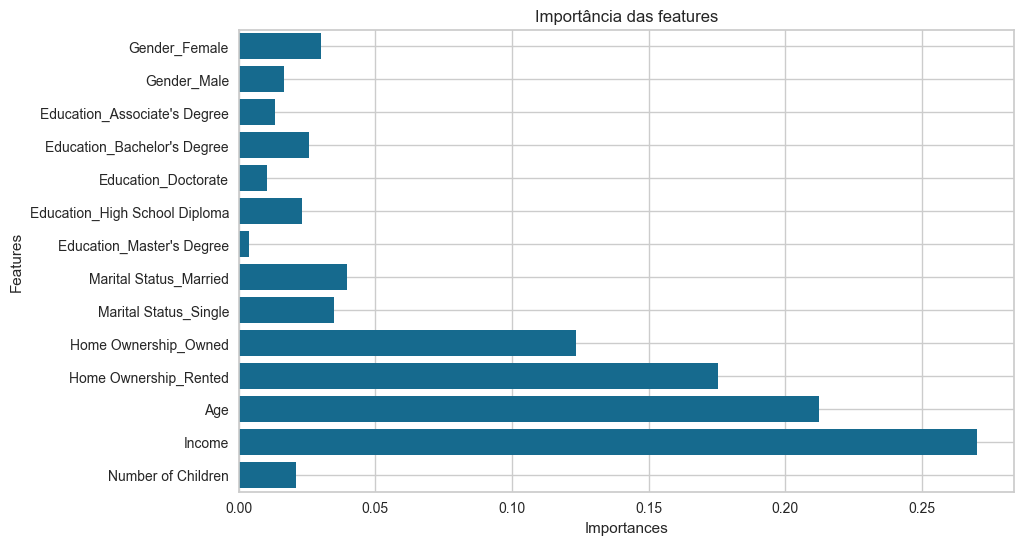

In [98]:
plt.figure(figsize=(10, 6))

sns.barplot(data = df_importances, x = df_importances['Importances'], y = df_importances['Features']).set(title = 'Importância das features')

plt.grid(True)

plt.savefig('importância-das-features.png', dpi = 300, bbox_inches = 'tight')

## Respondendo primeira pergunta
1. "Com base em dados como idade, renda, escolaridade e outros fatores, é possível prever a classificação do crédito de uma pessoa?"

Para responder essa pergunta, será feita uma simulação de um novo registro, com os dados necessários para fazer a previsão.

In [99]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [100]:
# Simulação de um novo registro
pessoa1 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Income": 5000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])
pessoa1

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,30,Male,5000,Bachelor's Degree,Single,0,Rented


Assim como no modelo, é preciso fazer o pré-processamento desses dados para que o modelo possa reconhecer

In [101]:
# Carregando o encoder e o scaler
import pickle
with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

In [102]:
with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

OBS: Para os novos dados que serão usados para previsão, não deve-se usar o "fit_transform" como no treinamento para o pré-processamento, mas sim o "transform"

In [103]:
# Fazendo o pré-processamento
pessoa1 = OHE_credit.transform(pessoa1)
pessoa1 = scaler_credit.transform(pessoa1)
pessoa1

array([[-0.97590007,  0.97590007, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596, -0.97590007,  0.97590007, -1.36398868,
         1.36398868, -0.93541364, -2.30517889, -0.64467125]])

Agora que o registro foi pré-processado, já é possível realizar a previsão com o modelo

In [104]:
# Carregando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

In [106]:
previsao = arvore_credit.predict(pessoa1)
previsao

array([0])

In [113]:
print(LE_credit.classes_)

['Average' 'High' 'Low']


In [114]:
for codigo, classe in enumerate(LE_credit.classes_):
    print(f"{codigo} → {classe}")

0 → Average
1 → High
2 → Low


Como é possível ver, a previsão da pessoa1 classificou o crédito com 0, ou seja, chance média ou 'Average', mas para melhorar a resposta é preciso decodificar o Label Encoder com 'inverse_transform'

In [115]:
with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

# Decodificando os rótulos do Label Encoder
resultado = LE_credit.inverse_transform(previsao)

In [116]:
print(f"Classificação de crédito prevista da pessoa 1: {resultado[0]}")

Classificação de crédito prevista da pessoa 1: Average
